#                                            Chipotle Sales Analysis

## Scenario

You are a financial data analyst at Chipotle and your manager has tasked you with analyzing the most recent sales numbers. She has provided the following set of questions she would like answered.

## Import Libraries

In [61]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
data = pd.read_csv('chipotle.tsv', sep = '\t')
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


## Questions

### 1. Which was the most-ordered item?

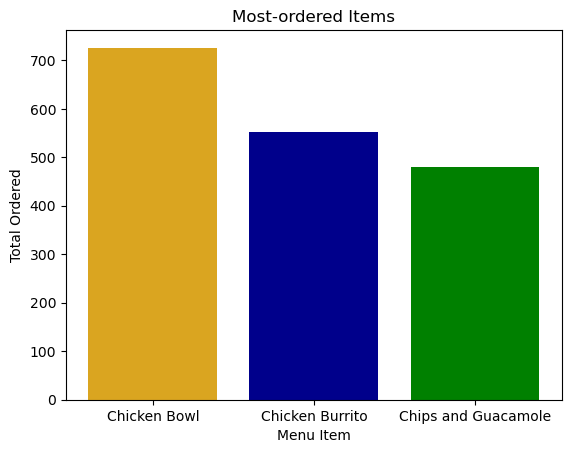

In [62]:
top_3 = pd.DataFrame(data.groupby(['item_name'])['item_name' ].count().sort_values(ascending=False).head(3))
'''Creates a dataframe containing the sum of all orders grouped by item name, limited to the top 3 results'''
plt.bar(top_3.index, top_3['item_name'], color = ['goldenrod', 'darkblue', 'green'])
plt.title('Most-ordered Items')
plt.xlabel('Menu Item')
plt.ylabel('Total Ordered')
plt.show()

### 2. For the most-ordered item, how many items were ordered?

In [63]:
print('Chicken Bowls: ' + str(data[data['item_name'] == 'Chicken Bowl']['quantity'].sum()))

Chicken Bowls: 761


### 3. What was the most ordered item in the choice_description column?

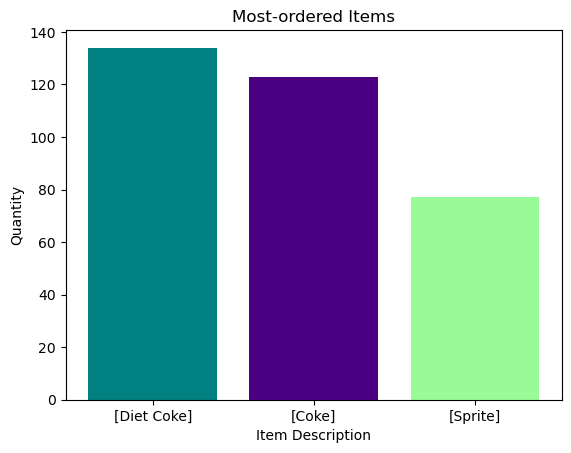

In [64]:
top_3_description = pd.DataFrame(data.groupby(['choice_description'])['choice_description'].count().sort_values(ascending=False).head(3))
plt.bar(top_3_description.index, top_3_description['choice_description'], color = ['teal', 'indigo', 'palegreen'])
plt.title('Most-ordered Items')
plt.xlabel('Item Description')
plt.ylabel('Quantity')
plt.show()

### 4. How many items were ordered in total?

In [65]:
print('Total items ordered: ' + str(data['quantity'].sum()))

Total items ordered: 4972


### 5. Turn the item price into a float

In [66]:
np.dtype(data['item_price'])

dtype('O')

In [67]:
data['item_price'] = data['item_price'].str.replace('$', '').astype(float)
data['item_price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4622 entries, 0 to 4621
Series name: item_price
Non-Null Count  Dtype  
--------------  -----  
4622 non-null   float64
dtypes: float64(1)
memory usage: 36.2 KB


C:\Users\Owner\AppData\Local\Temp\ipykernel_11628\3182214841.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['item_price'] = data['item_price'].str.replace('$', '').astype(float)


### 6. How much was the revenue for the period in the dataset?

In [68]:
total_revenue = (data['quantity'] * data['item_price']).sum()
print('Total revenue: $' + str(total_revenue))

Total revenue: $39237.02


### 7. How many orders were made in the period?

In [69]:
data.nunique(axis=0)

order_id              1834
quantity                 9
item_name               50
choice_description    1043
item_price              78
dtype: int64

### 8. What is the average revenue amount per order?

In [70]:
print('Average revenue per order: $' + str(round(total_revenue / len(pd.unique(data['order_id'])), 2)))

Average revenue per order: $21.39


### 9. How many different items are sold?

In [71]:
print('Unique items sold: ' + str(len(pd.unique(data['item_name']))))

Unique items sold: 50


## Other questions to explore

1. Are crispy or soft tacos more poopular?
2. What protein is the most popular? (Chicken, steak, or carnitas)
3. What protein generates the most revenue?

### 1. Are crispy or soft tacos more poopular?

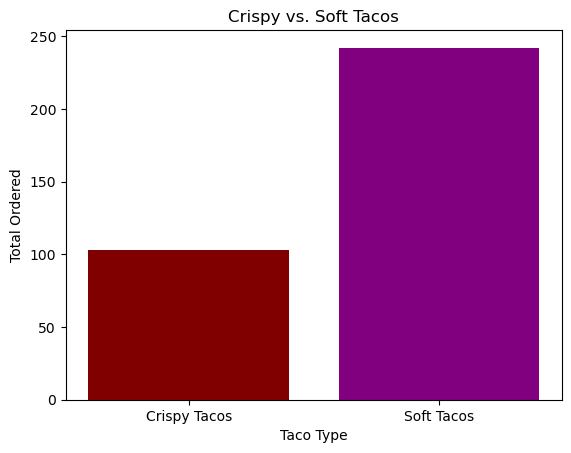

In [72]:
soft_tacos = len(data[data['item_name'].str.contains('Soft Tacos')])
crispy_tacos = len(data[data['item_name'].str.contains('Crispy Tacos')])
tacos = ['Crispy Tacos', 'Soft Tacos']
count = [crispy_tacos, soft_tacos]
plt.bar(tacos, count, color = ['maroon', 'purple'])
plt.xlabel('Taco Type')
plt.ylabel('Total Ordered')
plt.title('Crispy vs. Soft Tacos')
plt.show()

### 2. What protein is the most popular? (Chicken, steak, or carnitas)

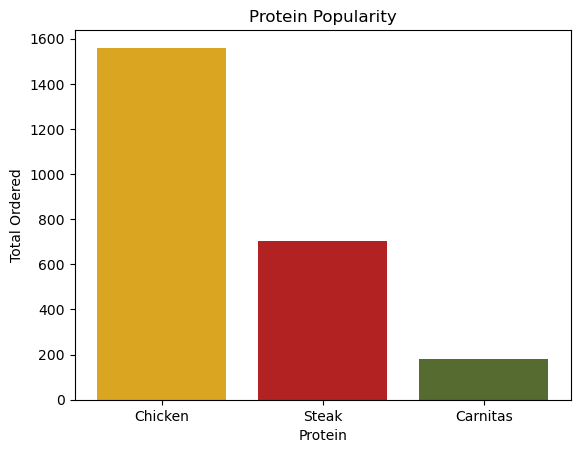

In [73]:
chicken = data[data['item_name'].str.contains('Chicken')]
chicken_count = len(chicken)
steak = data[data['item_name'].str.contains('Steak')]
steak_count = len(steak)
carnitas = data[data['item_name'].str.contains('Carnitas')]
carnitas_count = len(carnitas)
proteins = ['Chicken', 'Steak', 'Carnitas']
protein_count = [chicken_count, steak_count, carnitas_count]
plt.bar(proteins, protein_count, color = ['goldenrod', 'firebrick', 'darkolivegreen'])
plt.xlabel('Protein')
plt.ylabel('Total Ordered')
plt.title('Protein Popularity')
plt.show()

### 3. What protein generates the most revenue?

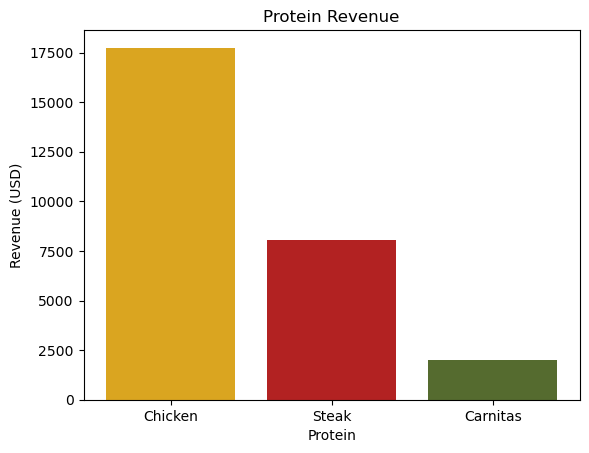

In [74]:
chicken_revenue = (chicken['quantity'] * chicken['item_price']).sum()
steak_revenue = (steak['quantity'] * steak['item_price']).sum()
carnitas_revenue = (carnitas['quantity'] * carnitas['item_price']).sum()
protein_revenue = [chicken_revenue, steak_revenue, carnitas_revenue]
plt.bar(proteins, protein_revenue, color = ['goldenrod', 'firebrick', 'darkolivegreen'])
plt.title('Protein Revenue')
plt.xlabel('Protein')
plt.ylabel('Revenue (USD)')
plt.show()